# Exercício

## Objetivo

O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

- Carregue a base de dados ***csv_result-ebay_confianca_completo.csv***, que é uma base de dados para prever confiança de usuários baseado em traços de personalidade extraídos de textos

- A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim

- Utilize o algoritmo ***Random Forest*** e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o ***Random Forest*** que é um algoritmo baseado em árvores de decisão.

- A ideia de utilização é a mesma, e no link a seguir você pode verificar a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Random Forest

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE


In [11]:
dataset = pd.read_csv("/content/drive/MyDrive/Estatística para Ciência de Dados e Machine Learning/Bases de dados/csv_result-ebay_confianca_completo.csv")

In [12]:
dataset.shape

(5806, 75)

In [13]:
dataset

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim


In [14]:
dataset['blacklist'] = dataset['blacklist'] == "S"
dataset

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,49,0,False,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,False,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,False,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,False,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim


<Axes: xlabel='reputation', ylabel='count'>

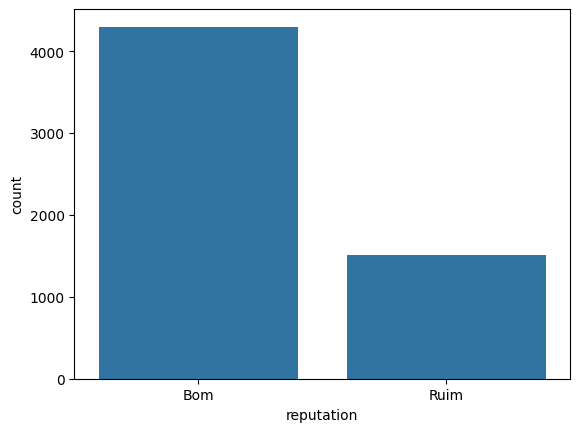

In [23]:
sns.countplot(dataset, x='reputation')

In [24]:
len(dataset.columns)

75

In [35]:
x = dataset.iloc[:, 0:74].values
y = dataset.iloc[:, 74].values

In [36]:
x.shape, y.shape

((5806, 74), (5806,))

In [45]:
a, b = np.unique(y, return_counts=True)
print(f"{a[0]}: {b[0]}")
print(f"{a[1]}: {b[1]}")

Bom: 4299
Ruim: 1507


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [51]:
print(f"X Train: {x_train.shape} - X Test: {x_test.shape} ")
print(f"Y train: {y_train.shape} - Y test: {y_test.shape}")

X Train: (4644, 74) - X Test: (1162, 74) 
Y train: (4644,) - Y test: (1162,)


In [70]:
# Train
model = RandomForestClassifier(max_depth=2)
model.fit(x_train, y_train)

# Predict
forecast = model.predict(x_test)

accurancy = accuracy_score(y_test, forecast)
print(f"Acurracy: {accurancy * 100:.2f}%")

Acurracy: 74.01%


## Tome Links

In [90]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(x, y)


In [91]:
x_tl.shape, y_tl.shape

((5417, 74), (5417,))

In [92]:
print(np.unique(y, return_counts=True))
print(np.unique(y_tl, return_counts=True))

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))
(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))


In [93]:
x_train_tl, x_test_tl, y_train_tl, y_test_tl = train_test_split(x_tl, y_tl, test_size=0.2, stratify=y_tl)

print(f"X Train: {x_train_tl.shape} - X Test: {x_test_tl.shape} ")
print(f"Y train: {y_train_tl.shape} - Y test: {y_test_tl.shape}")

X Train: (4333, 74) - X Test: (1084, 74) 
Y train: (4333,) - Y test: (1084,)


In [ ]:
model_tl = RandomForestClassifier()
model_tl.fit(x_train_tl, y_train_tl)

forecast_tl = model_tl.predict(x_test_tl)

accuracy_tl = accuracy_score(y_test_tl, forecast_tl)
print(f"Acurracy: {accuracy_tl * 100:.2f}%")


## SMOTE

In [95]:
sm = SMOTE(sampling_strategy='minority')
x_sm, y_sm = sm.fit_resample(x, y)

In [96]:
x_sm.shape, y_sm.shape

((8598, 74), (8598,))

In [98]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, stratify=y_sm)

print(f"X Train: {x_train_sm.shape} - X Test: {x_test_sm.shape} ")
print(f"Y train: {y_train_sm.shape} - Y test: {y_test_sm.shape}")

X Train: (6878, 74) - X Test: (1720, 74) 
Y train: (6878,) - Y test: (1720,)


In [111]:
model_sm = RandomForestClassifier()
model_sm.fit(x_train_sm, y_train_sm)

forecast_sm = model_sm.predict(x_test_sm)

accuracy_sm = accuracy_score(y_test_sm, forecast_sm)
print(f"Acurracy: {accuracy_sm * 100:.2f}%")

Acurracy: 81.63%
